In [1]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#importing the dataset from Netlogo runs
df = pd.read_csv("../Netlogo/output/normal_run-table.csv",skiprows=6)
#setting the index to run numbers, removing unnecessary columns
df = df.set_index("[run number]").drop(columns=["size-of-std","avg_migrant_income","random-attributes?","housing-market-inflation?","aggregate-cluster-size","migrant-multiplier"])

In [56]:
avg_price = pd.DataFrame()
i = 0
for r in df[df["[step]"]==40]["KPI-avg_price"]:
    avg_price[i] = r.replace("[","").replace("]","").split(" ")
    i = i + 1

In [58]:
avg_price = avg_price.T

In [110]:
i = 0
avg_price_df = pd.DataFrame(columns=["neighborhood","value","run"])
for c in range(114):
    for r in range(16):
        avg_price_df.loc[i] = [int(avg_price[2*c][r]), round(float(avg_price[2*c+1][r])) , r]
        i += 1

<Figure size 1440x1440 with 0 Axes>

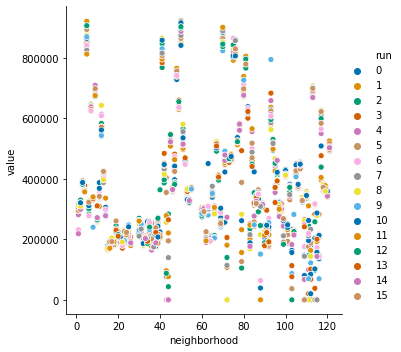

In [153]:
plt.figure(figsize=(20,20))
sns.relplot(y="value",x="neighborhood",hue="run",data=avg_price_df,palette="colorblind")

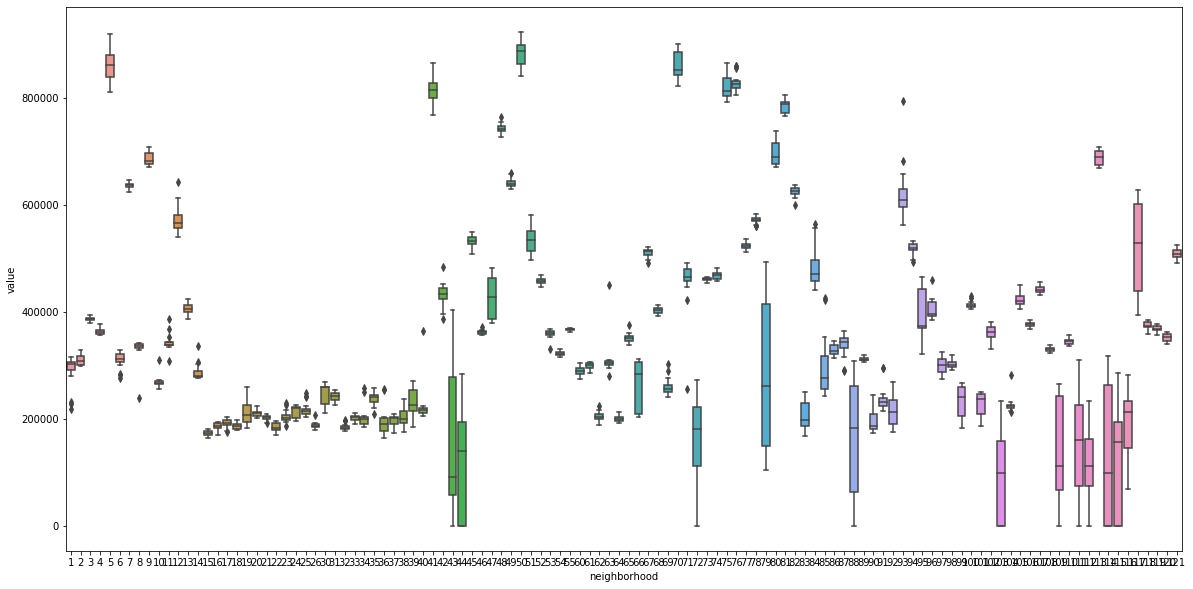

In [149]:
plt.figure(figsize=(20,10))
sns.boxplot(y="value",x="neighborhood",data=avg_price_df)